In [1]:
#actual lab !pip install sklearn
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = datasets.load_digits()
digits


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
print(digits.data[0])
print(digits.images[0])
print(digits.target[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


In [4]:
num_split = int(0.7*len(digits.data))

train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

In [5]:
#lab1 implementation
#
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 5,algorithm ='brute')
classifier_knn.fit(train_features, train_labels)
predicted_labels = classifier_knn.predict(test_features)


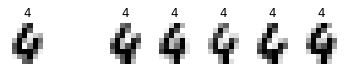

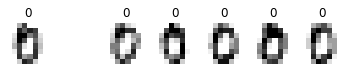

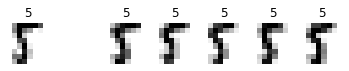

(540, 5)


In [6]:
distances, neighbors = classifier_knn.kneighbors(test_features) 
for i in range(3):
    plt.subplot(2, 7, 1)
    plt.axis('off')
    plt.imshow(digits.images[num_split+i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(predicted_labels[i])
    j=0
    for n in neighbors[i]:
        j+=1
        plt.subplot(2, 7, j +2)
        plt.axis('off')
        plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(train_labels[n])
    plt.show()
print(distances.shape)

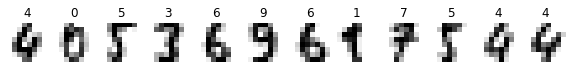

In [7]:
plt.figure(figsize=(10,10))
images_and_predictions = list(zip(digits.images[num_split:], predicted_labels))
for index, (image, prediction) in enumerate(images_and_predictions[:12]):
    plt.subplot(2, 12, index +1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(prediction)

plt.show()


In [8]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier_knn, metrics.classification_report(test_labels, predicted_labels)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predicted_labels))

Classification report for classifier KNeighborsClassifier(algorithm='brute'):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540


Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  

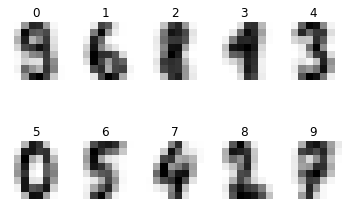

In [9]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=10)
clusters = k_mean.fit(train_features)

cluster_v = k_mean.cluster_centers_
p_cluster_labels = k_mean.predict(cluster_v)
for i in range(10):
    plt.subplot(2, 5,i+1)
    plt.axis('off')
    cluster_image = cluster_v[i].reshape(8,8)
    plt.imshow(cluster_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(p_cluster_labels[i])
plt.show()
predicted_cluster_labels = k_mean.predict(test_features)

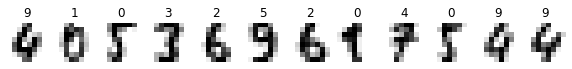

In [11]:
plt.figure(figsize=(10,10))
images_and_predictions = list(zip(digits.images[num_split:], predicted_cluster_labels))
for index, (image, prediction) in enumerate(images_and_predictions[:12]):
    plt.subplot(2, 12, index +1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(prediction)

plt.show()

In [14]:
print("Classification report for classifier %s:\n%s\n"
      % (k_mean, metrics.classification_report(test_labels, predicted_cluster_labels)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predicted_cluster_labels))

Classification report for classifier KMeans(n_clusters=10):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        53
           3       0.80      0.77      0.79        53
           4       0.03      0.04      0.03        57
           5       0.24      0.32      0.27        56
           6       0.04      0.02      0.03        54
           7       0.00      0.00      0.00        54
           8       0.41      0.63      0.50        52
           9       0.00      0.00      0.00        55

    accuracy                           0.18       540
   macro avg       0.15      0.18      0.16       540
weighted avg       0.15      0.18      0.16       540


Confusion matrix:
[[ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0 17  0 35  0]
 [ 0  1  0  6  0  3  0 42  1  0]
 [ 2  0  0 41  3  1  0  0  6  0]
 [ 0  1  0  0  2  0  1  0  1 5

In [16]:
predicted_cluster_labels2 = k_mean.predict(train_features)
print('completeness score: %s'  % metrics.completeness_score( train_labels, predicted_cluster_labels2))
print('homogeneity score: %s' % metrics.homogeneity_score( train_labels, predicted_cluster_labels2))
print('mutual info: %s' %metrics.adjusted_mutual_info_score( train_labels, predicted_cluster_labels2))

completeness score: 0.7537490318842521
homogeneity score: 0.7447749746781513
mutual info: 0.745585721056666
